# Mobile Detection Model

This notebook tries to create a supervised learning model which recognizes whether an image contains a mobile object or not. <br>
Implementation steps

The steps for creating the model are as follows:<br>
1)	Data Exploration <br>
2)	Data pre-processing <br>
3)	(CNN) Model architecture <br>
4)	Model Training <br>
5)	Model evaluation<br>
## Data Exploration
This section will provide some basic exploration of the dataset<br>



c:\users\kones\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


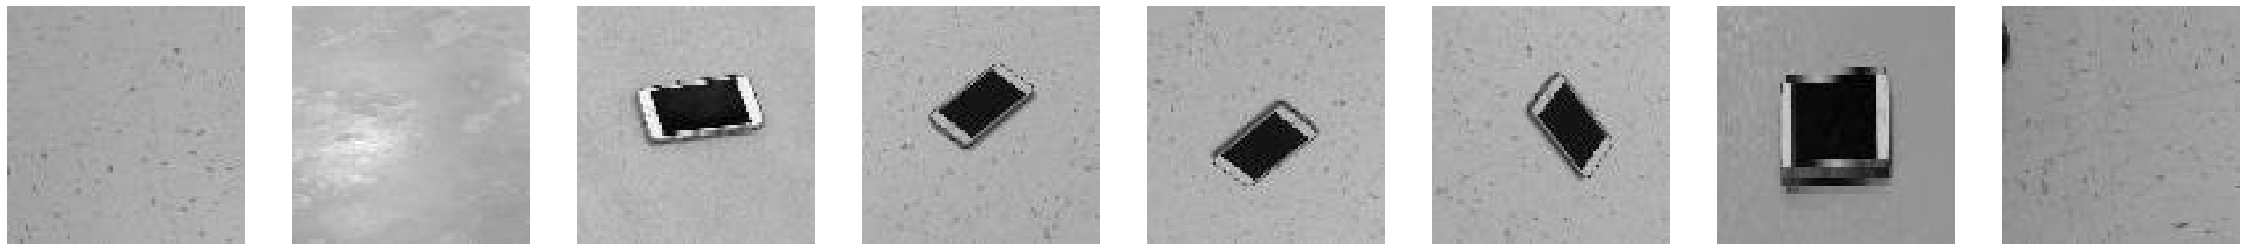

In [22]:
import tensorflow as tf
from flask import Flask
from flask import Response, request
from flask import jsonify
from flask import Flask, Response, json, request, render_template
import json
import tensorflow.keras.backend as K
#from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.applications.inception_v3 import preprocess_input
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import RMSprop
import joblib
from PIL import Image
from io import BytesIO
import base64
from keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model


#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
base_dir = "img_yes_no"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
category = os.listdir(train_dir)
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 1
ncols = 8

# Index for iterating over images
pic_index = 0

pic_index += 8

for it in category:
  # Set up matplotlib fig, and size it to fit 4x4 pics
  fig = plt.gcf()
  fig.set_size_inches(ncols * 5, nrows * 5)
  train_cat_dir = os.path.join(val_dir, it)
  train_cat_fnames = os.listdir(train_cat_dir)
  next_pix = [os.path.join(train_cat_dir, fname) 
                  for fname in train_cat_fnames[pic_index-8:pic_index]]

  for i, img_path in enumerate(next_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()





In [24]:
train_files = sum([len(files) for i, j, files in os.walk(train_dir)])
val_files = sum([len(files) for i, j, files in os.walk(val_dir)])
print("Train Dataset", train_files,"Val Dataset", val_files)

240 80


# Data pre-processing & Model architecture

In [2]:
import tensorflow as tf
from flask import Flask
from flask import Response, request
from flask import jsonify
from flask import Flask, Response, json, request, render_template
import json
import tensorflow.keras.backend as K
#from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.applications.inception_v3 import preprocess_input
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import RMSprop
import joblib
from PIL import Image
from io import BytesIO
import base64
from keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

base_dir = "img_yes_no"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
category = os.listdir(train_dir)
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 1
ncols = 8
train_files = sum([len(files) for i, j, files in os.walk(train_dir)])
val_files = sum([len(files) for i, j, files in os.walk(val_dir)])

n_classes = 2
epochs = 50
nb_train_samples = train_files
nb_validation_samples = val_files
num_epochs = epochs



img_width, img_height = 150, 150
train_data_dir = train_dir
validation_data_dir = val_dir
batch_size = 32

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with 5 nodes and softmax activation
###output = layers.Dense(1, activation='softmax')(x)
output = layers.Dense(2, activation='softmax')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)
print(model.summary())

#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0   

# Model Training 

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
    )

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
    )
history = model.fit_generator(train_generator,
                steps_per_epoch = nb_train_samples, 
                validation_data=validation_generator,
                validation_steps=nb_validation_samples, 
                epochs=5,
                verbose=2)
#model.save("my_model_yes_no.h5")
#history = keras.models.load_model("my_model_yes_no.h5")


Found 240 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Epoch 1/5
Epoch 1/5
240/240 - 119s - loss: 0.0279 - acc: 0.9937 - val_loss: 0.2803 - val_acc: 0.9496
Epoch 2/5
Epoch 1/5
240/240 - 125s - loss: 0.0106 - acc: 0.9972 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 3/5
Epoch 1/5
240/240 - 123s - loss: 0.0097 - acc: 0.9982 - val_loss: 1.3291e-04 - val_acc: 1.0000
Epoch 4/5
Epoch 1/5
240/240 - 117s - loss: 1.4608e-04 - acc: 1.0000 - val_loss: 3.4969e-05 - val_acc: 1.0000
Epoch 5/5
Epoch 1/5
240/240 - 119s - loss: 5.5069e-04 - acc: 0.9999 - val_loss: 2.6472e-05 - val_acc: 1.0000


# Model Evaluation

In [35]:
history.history

{'loss': [0.026245512330658836,
  0.010907995721794982,
  0.009756219761366083,
  0.00014284691910057114,
  0.0005734755614978187],
 'acc': [0.99375, 0.99722224, 0.99819446, 1.0, 0.9998611],
 'val_loss': [0.280342802296218,
  0.0015852200755034573,
  0.00013291444645346928,
  3.4969035345966405e-05,
  2.6471590666687915e-05],
 'val_acc': [0.94962686, 1.0, 1.0, 1.0, 1.0]}

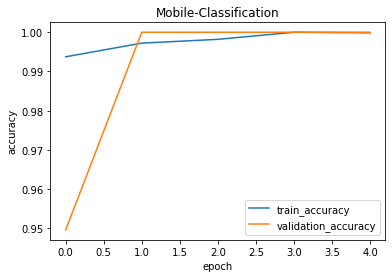

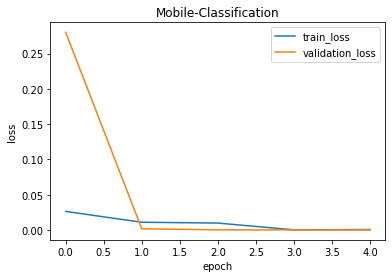

In [36]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['acc']) # change acc to accuracy if testing TF 2.0
    plt.plot(history.history['val_acc']) # change val_accuracy if testing TF 2.0
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()


def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


plot_accuracy(history,'Mobile-Classification')
plot_loss(history,'Mobile-Classification')